In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

data['time'] = pd.to_datetime(data['time'])

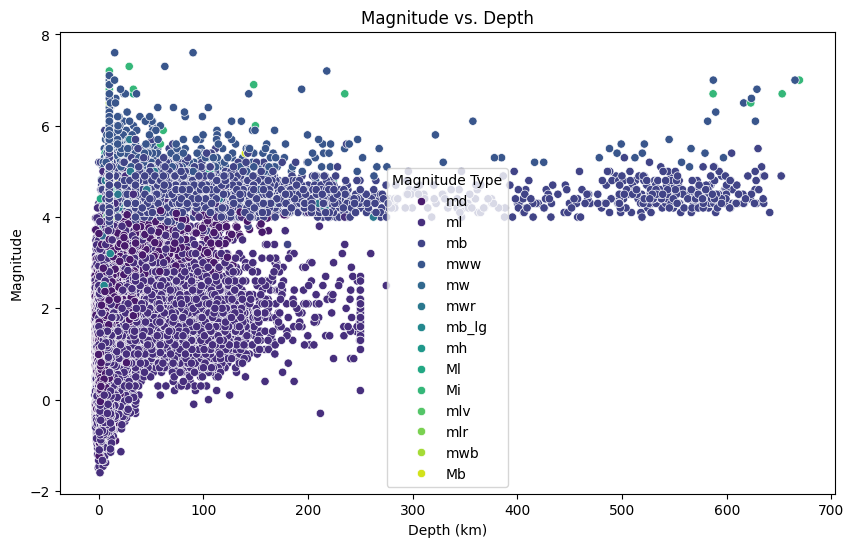

In [2]:
# Scatter plot of Magnitude vs. Depth
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='mag', data=data, hue='magType', palette='viridis')
plt.title('Magnitude vs. Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.legend(title='Magnitude Type')
plt.show()

In [3]:


# Binning latitude and longitude
data['latitude_bin'] = pd.cut(data['latitude'], bins=30)
data['longitude_bin'] = pd.cut(data['longitude'], bins=30)

C:\Users\Soroush\AppData\Local\Temp\ipykernel_20536\109151515.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = data.pivot_table(index='latitude_bin', columns='longitude_bin', values='mag', aggfunc='count').fillna(0)


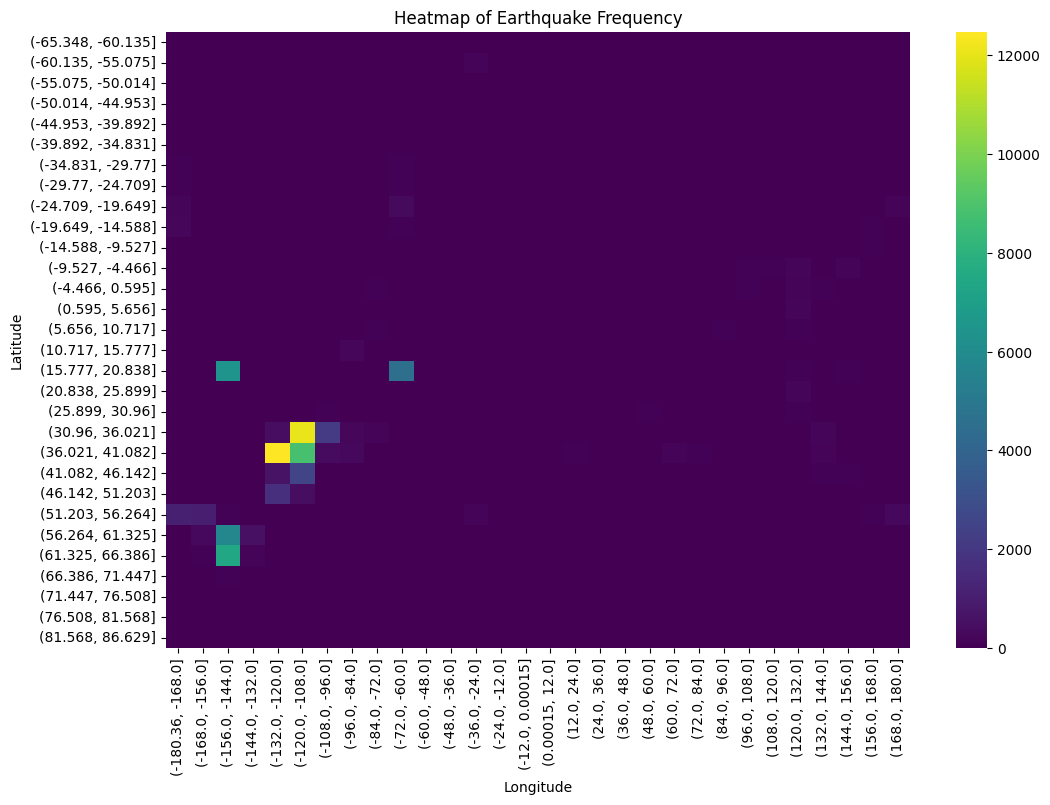

In [4]:


# Heatmap of Earthquake Frequency by Location
plt.figure(figsize=(12, 8))
heatmap_data = data.pivot_table(index='latitude_bin', columns='longitude_bin', values='mag', aggfunc='count').fillna(0)
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Earthquake Frequency')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\Soroush\AppData\Local\Temp\ipykernel_20536\1541417212.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('time')['mag'].resample('M').count().plot()


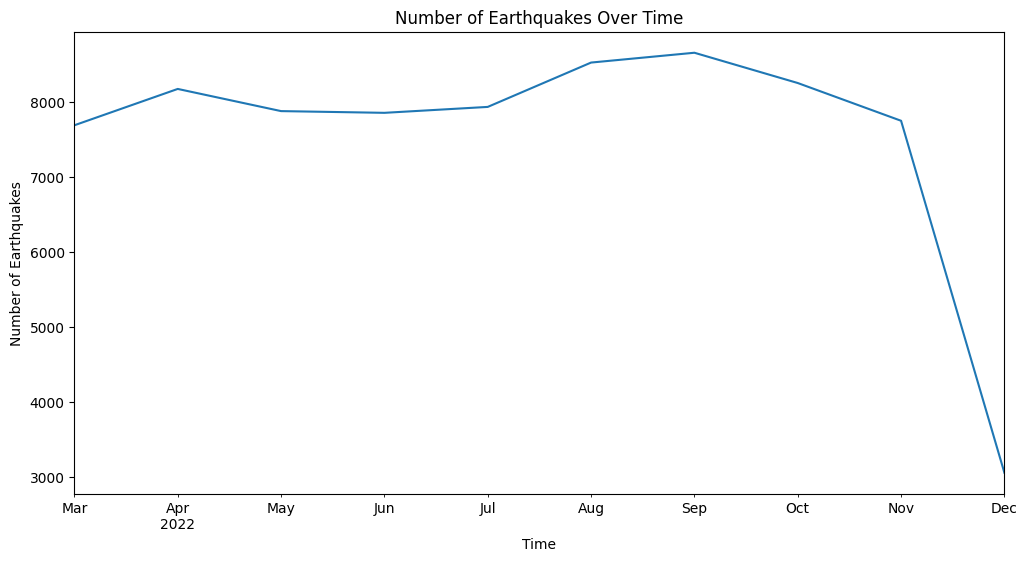

In [5]:


# Time Series Analysis of Earthquakes
plt.figure(figsize=(12, 6))
data.set_index('time')['mag'].resample('M').count().plot()
plt.title('Number of Earthquakes Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Earthquakes')
plt.show()

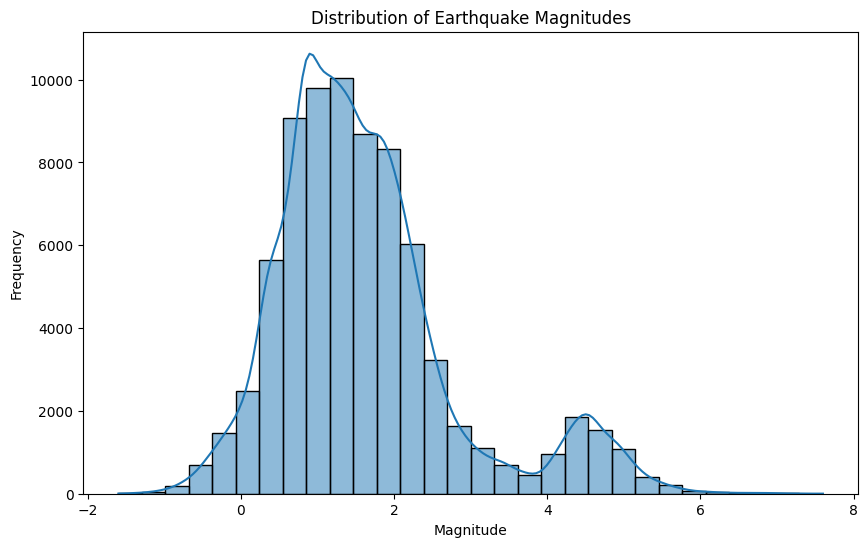

In [6]:


# Bar Chart of Earthquake Magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(data['mag'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

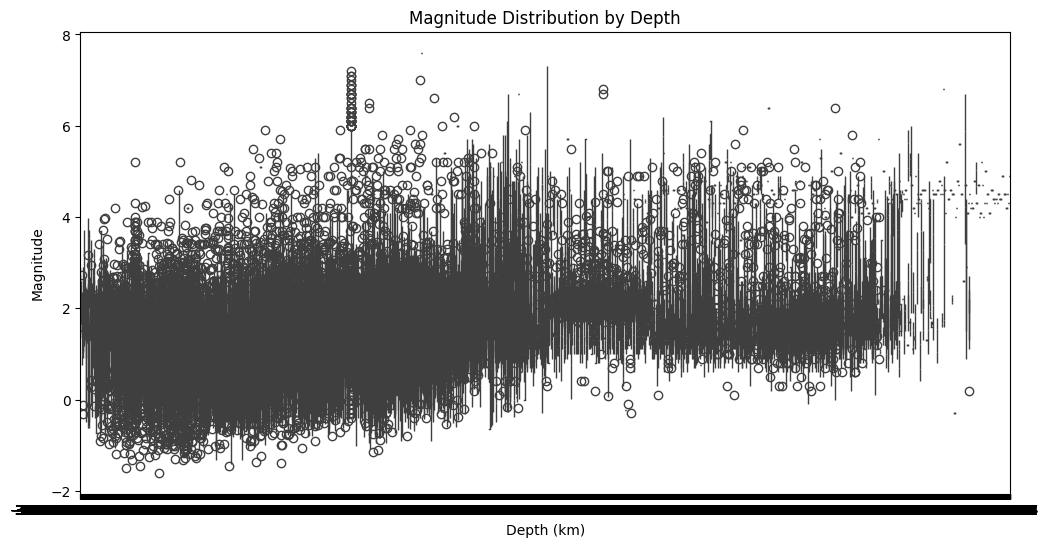

In [7]:


# Box Plot of Magnitude by Depth
plt.figure(figsize=(12, 6))
sns.boxplot(x='depth', y='mag', data=data)
plt.title('Magnitude Distribution by Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

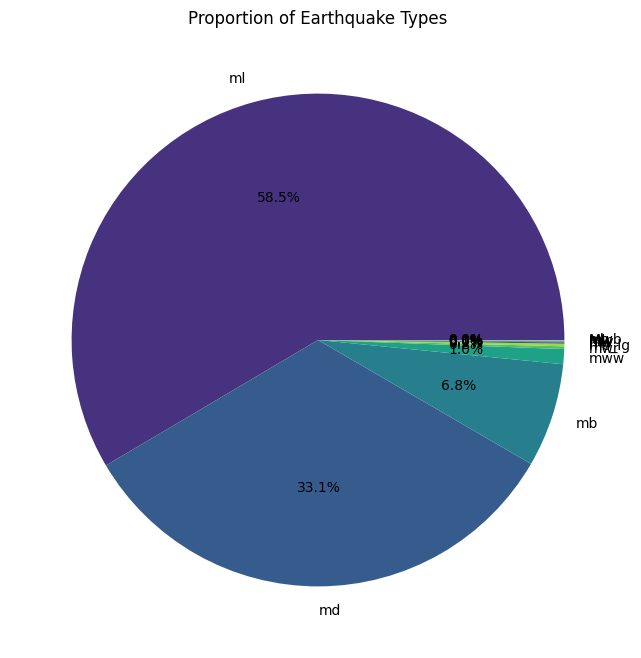

In [8]:


# Pie Chart of Earthquake Types
plt.figure(figsize=(8, 8))
data['magType'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Proportion of Earthquake Types')
plt.ylabel('')
plt.show()

In [7]:
import lightningchart as lc
import random

with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)
# here the reason of why we need lookup_values is 
n = 100000
x_values = [random.gauss(0, 1) for _ in range(n)]
y_values = [random.gauss(0, 1) for _ in range(n)]
lookup_values = [random.uniform(0, 1) for _ in range(n)]

chart = lc.ScatterChart(
    theme=lc.Themes.White,
    title='Scatter Chart',
    point_shape='triangle',
    xlabel='x',
    ylabel='y',
    individual_colors=True,
    individual_lookup_values=True
)
series = chart.series.append_samples(
    x_values=x_values,
    y_values=y_values,
    lookup_values=lookup_values
)
series.set_palette_colors(
    steps=[
        {'value': 0, 'color': lc.Color(0, 64, 128)},
        {'value': 1, 'color': lc.Color(255, 128, 64)},
    ],
    look_up_property='value',
    percentage_values=False
)
legend = chart.add_legend(data=chart).set_title('')
chart.open()

127.0.0.1 - - [17/Jul/2024 17:52:35] "GET / HTTP/1.1" 200 -


In [1]:
import lightningchart as lc
import pandas as pd
import numpy as np
import builtins

with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

x_values = data['depth'].values.tolist()
y_values = data['mag'].values.tolist()
min_value=int(builtins.min(y_values))
max_value=int(builtins.max(y_values))
lookup_values = y_values

chart = lc.ScatterChart(
    theme=lc.Themes.White,
    title='Magnitude vs. Depth',
    point_shape='circle',
    xlabel='Depth (km)',
    ylabel='Magnitude',
    individual_colors=True,
    individual_lookup_values=True
)
series = chart.series.append_samples(
    x_values=x_values,
    y_values=y_values,
    lookup_values=lookup_values
)
series.set_palette_colors(
    steps=[
        {'value': min_value, 'color': lc.Color(0, 64, 128)},
        {'value': max_value, 'color': lc.Color(255, 128, 64)},
    ],
    look_up_property='value',
    percentage_values=False
)
legend = chart.add_legend(data=chart).set_title('Magnitude')
chart.open()


127.0.0.1 - - [17/Jul/2024 21:57:50] "GET / HTTP/1.1" 200 -


In [72]:
import lightningchart as lc
import pandas as pd
import numpy as np
import builtins
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex, to_rgb

# Read the license key from a file
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the data
file_path = 'D:/Computer Aplication/WorkPlacement/Projects/Project5/usgs_main.csv'
data = pd.read_csv(file_path)

# Assuming there's a 'type' column for magnitude types
x_values = data['depth'].values.tolist()
y_values = data['mag'].values.tolist()
mag_types = data['type'].values.tolist()

# Generate a color map for the unique magnitude types
unique_types = list(set(mag_types))
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_types)))

# Map each type to a color
type_color_map = {mag_type: to_hex(color) for mag_type, color in zip(unique_types, colors)}

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    rgb = to_rgb(hex_color)
    return int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255)

# Assign colors based on magnitude types
lookup_values = [type_color_map[mag_type] for mag_type in mag_types]

# Create a scatter chart
chart = lc.ScatterChart(
    theme=lc.Themes.White,
    title='Scatter Chart',
    point_shape='triangle',
    xlabel='Depth',
    ylabel='Magnitude',
    individual_colors=True,
    individual_lookup_values=True
)

# Append data samples to the chart series
series = chart.series.append_samples(
    x_values=x_values,
    y_values=y_values,
    lookup_values=lookup_values
)

# Set the color palette for the lookup values using RGB colors
series.set_palette_colors(
    steps=[
        {'value': i, 'color': lc.Color(*hex_to_rgb(type_color_map[mag_type]))} 
        for i, mag_type in enumerate(unique_types)
    ],
    look_up_property='value',
    percentage_values=False
)

# Explicitly set axis limits slightly beyond the data range
chart.get_default_x_axis().set_interval(0, builtins.max(x_values) + 1)
chart.get_default_y_axis().set_interval(0, builtins.max(y_values) + 1)

# Add a legend to the chart
legend = chart.add_legend(data=chart).set_title('Magnitude Type')
for mag_type in unique_types:
    legend.add(mag_type)

chart.open()


AttributeError: 'str' object has no attribute 'id'